## Imports

In [135]:
from datetime import datetime, timedelta

import matplotlib
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6


import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd

## Data Analysis

In [76]:
births_2000s_df = pd.read_csv('US_births_2000-2014_SSA.csv')
births_2000s_df_with_index = births_2000s_df\
    .rename(columns={'date_of_month': 'day'})\
    .set_index(pd.to_datetime(
        births_2000s_df.rename(columns={'date_of_month': 'day'})
        [['year', 'month', 'day']]))
births_2000s_df_with_index.head()

,year,month,day,day_of_week,births
2000-01-01,2000,1,1,6,9083
2000-01-02,2000,1,2,7,8006
2000-01-03,2000,1,3,1,11363
2000-01-04,2000,1,4,2,13032
2000-01-05,2000,1,5,3,12558


In [165]:
# Assert that no days are missing data, so no imputation is needed.

def num_days_in_year(year):
    return (datetime(year, 12, 31) - datetime(year, 1, 1)).days + 1


def missing_days(df):
    return births_2000s_df_with_index.groupby('year').births.describe()\
        .assign(expected_days=lambda df: list(map(num_days_in_year, df.index)))\
        .assign(missing=lambda df: df.expected_days - df['count'])

        
assert not any(missing_days(births_2000s_df_with_index).missing)

TODO: is any day missing?

### Some Statistics

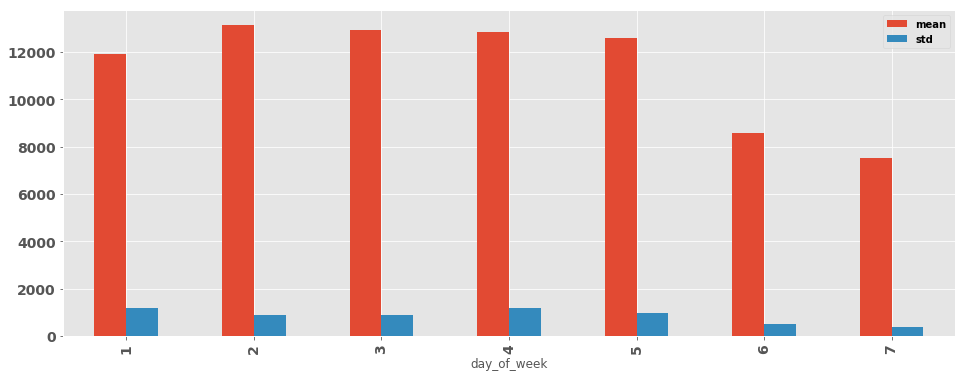

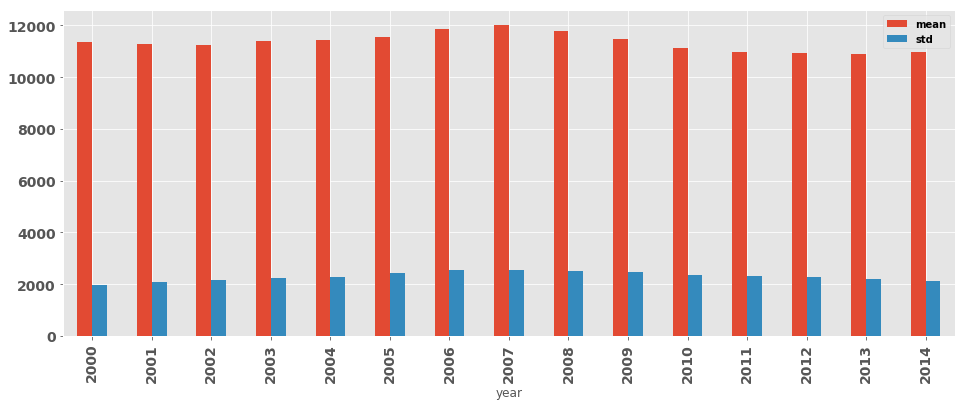

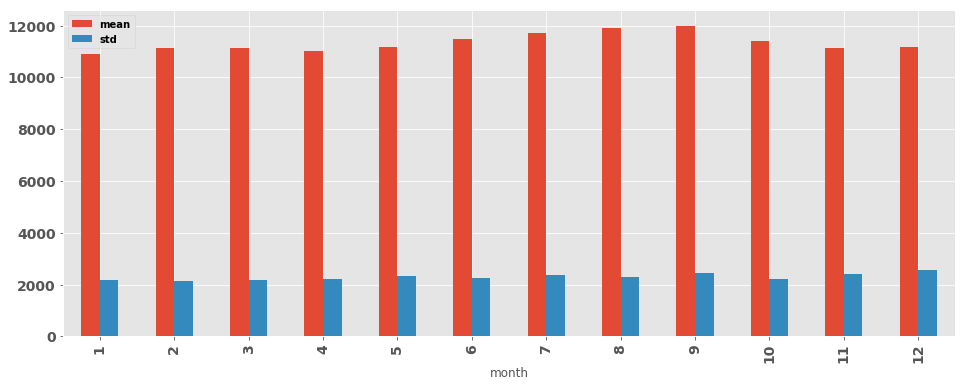

In [122]:
def show_mean_and_std_by_time_dimension(time_dimension):
    births_2000s_df_with_index.groupby(time_dimension).births.describe()[['mean', 'std']].plot.bar(fontsize=14)

list(map(show_mean_and_std_by_time_dimension, ['day_of_week', 'year', 'month']));

In [127]:
births_2000s_df_with_index.groupby('day_of_week')

In [77]:
births_2000s_df_with_index.groupby('month').births.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,465.0,10908.791398,2166.016841,6540.0,8439.00,11917.0,12542.00,13960.0
2,424.0,11145.502358,2153.713646,6707.0,8732.00,12079.0,12633.25,14207.0
3,465.0,11124.647312,2174.596904,6497.0,8682.00,12075.0,12689.00,13844.0
4,450.0,11023.888889,2203.383134,6545.0,8407.75,12007.0,12615.50,13729.0
5,465.0,11173.000000,2333.335522,6609.0,8490.00,12275.0,12898.00,14569.0
6,450.0,11474.133333,2255.685813,6963.0,8792.00,12481.0,13079.75,14395.0
7,465.0,11721.329032,2358.034529,7279.0,9067.00,12817.0,13473.00,15007.0
8,465.0,11914.344086,2299.771394,7352.0,9234.00,13008.0,13426.00,15374.0
9,450.0,11999.093333,2456.548637,7399.0,9231.00,13153.0,13828.75,16081.0


In [78]:
births_2000s_df_with_index.groupby('year').births.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2000,366.0,11337.699454,1978.105515,6719.0,9157.00,12240.0,12821.50,13991.0
2001,365.0,11262.912329,2074.471546,6603.0,8935.00,12342.0,12733.00,14235.0
2002,365.0,11230.994521,2143.715464,6774.0,8816.00,12253.0,12741.00,14247.0
2003,365.0,11405.643836,2242.397443,6744.0,8850.00,12434.0,13068.00,14700.0
2004,366.0,11439.516393,2278.380724,6259.0,8786.75,12586.5,13127.00,14526.0
2005,365.0,11539.564384,2423.989618,6224.0,8688.00,12700.0,13320.00,14744.0
2006,365.0,11877.134247,2536.921149,6409.0,8883.00,13042.0,13827.00,15454.0
2007,365.0,12002.147945,2558.011278,6624.0,8977.00,13305.0,13837.00,15590.0
2008,366.0,11777.969945,2490.235669,6471.0,8858.25,13076.0,13538.50,15645.0


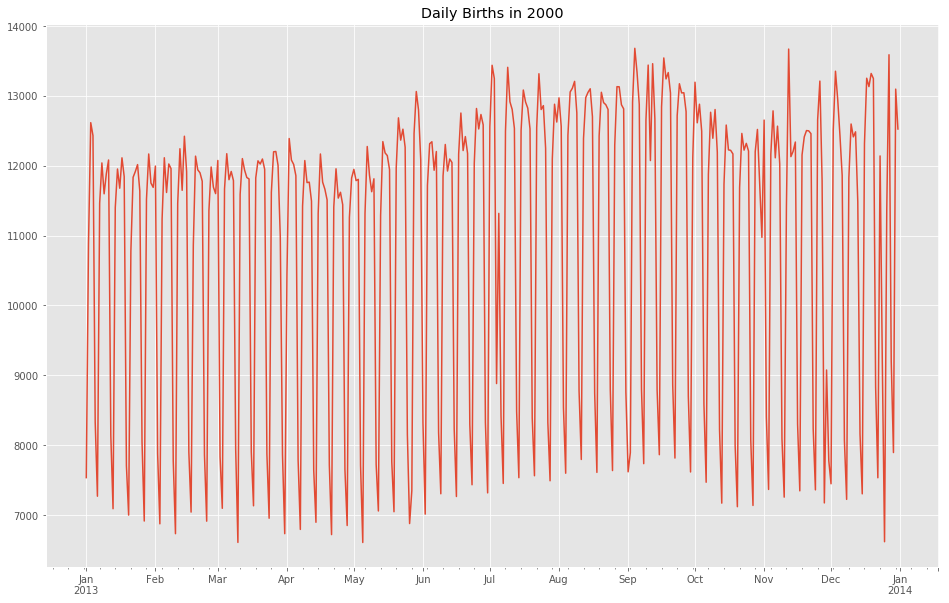

In [69]:
births_2000s_df_with_index[lambda r: r.year == 2013]\
    .births\
    .plot(title="Daily Births in 2000");